In [146]:
import numpy as np
import pandas as pd
import simpful as sf
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib import cm
# from plotly.subplots import make_subplots
from plotly import graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [147]:
FS = sf.FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



### Incialização das variáveis

#### Variáveis de Entrada

In [148]:
# Entrada: Erro
E1 = sf.FuzzySet(function=sf.Trapezoidal_MF(-15, -15, -10, -5), term="EGN")
E2 = sf.FuzzySet(function=sf.Triangular_MF(-7, -4, -0.5) , term="EN")
E3 = sf.FuzzySet(function=sf.Triangular_MF(-1.5, 0, 1.5), term="EZ")
E4 = sf.FuzzySet(function=sf.Triangular_MF(0.5, 4, 7), term="EP")
E5 = sf.FuzzySet(function=sf.Trapezoidal_MF(5, 10, 15, 15), term="EGP")
Erro = sf.LinguisticVariable([E1,E2,E3,E4,E5], universe_of_discourse=[-15,15])
FS.add_linguistic_variable("Erro", LV=Erro)

# Entrada: Derivada do Erro
DE1 = sf.FuzzySet(function=sf.Trapezoidal_MF(-5, -5, -3, -1.5), term="DEGN")
DE2 = sf.FuzzySet(function=sf.Triangular_MF(-2.5, -1, -0.25) , term="DEN")
DE3 = sf.FuzzySet(function=sf.Triangular_MF(-0.5, 0, 0.5), term="DEZ")
DE4 = sf.FuzzySet(function=sf.Triangular_MF(0.25, 1, 2.5), term="DEP")
DE5 = sf.FuzzySet(function=sf.Trapezoidal_MF(1.5, 3, 5, 5), term="DEGP")
derivadaErro = sf.LinguisticVariable([DE1,DE2,DE3,DE4,DE5], universe_of_discourse=[-5,5])
FS.add_linguistic_variable("derivadaErro", LV=derivadaErro)

#### Variáveis de Saida

In [149]:
# Saída: Derivada da Frequência
DF1 = sf.FuzzySet(function=sf.Trapezoidal_MF(-5, -5, -4, -2), term="DFGN")
DF2 = sf.FuzzySet(function=sf.Triangular_MF(-3, -1.5, -0.25) , term="DFN")
DF3 = sf.FuzzySet(function=sf.Triangular_MF(-0.5, 0, 0.5), term="DFZ")
DF4 = sf.FuzzySet(function=sf.Triangular_MF(0.25, 1.5, 3), term="DFP")
DF5 = sf.FuzzySet(function=sf.Trapezoidal_MF(2, 4, 5, 5), term="DFGP")
deltaFrequencia = sf.LinguisticVariable([DF1,DF2,DF3,DF4,DF5], universe_of_discourse=[-5,5])
FS.add_linguistic_variable("deltaFrequencia", LV=deltaFrequencia)

### Visualização gráfica

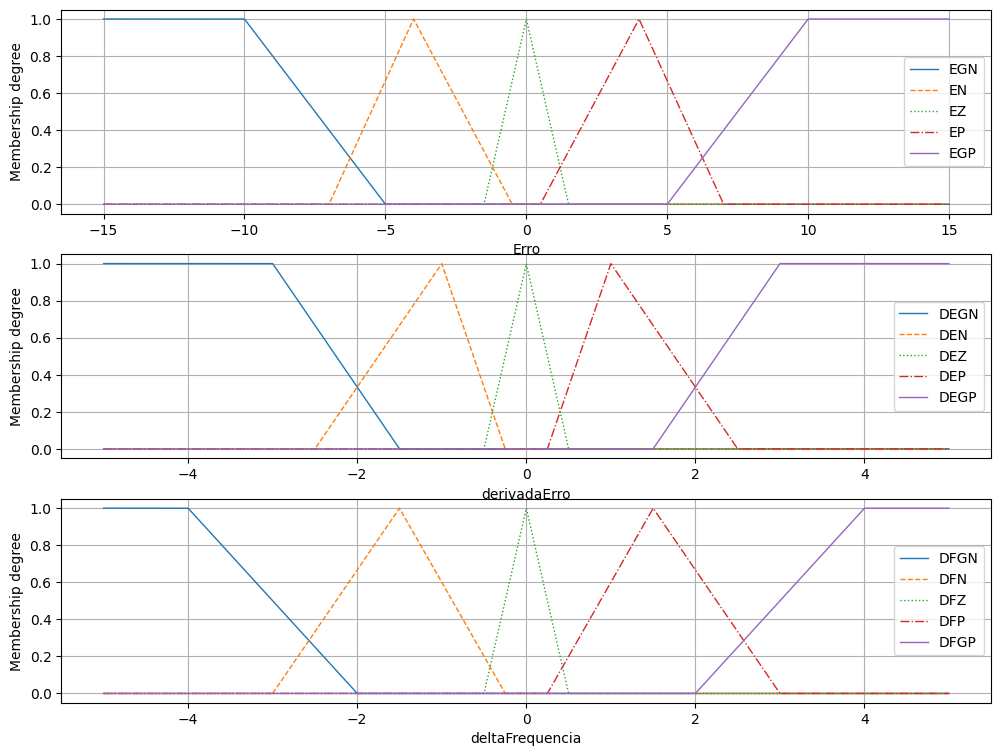

In [150]:
fig, axs = plt.subplots(3,1, figsize=(12,9))
for var_index, var_name in enumerate(list(FS._lvs.keys())):
    FS.plot_variable(var_name=var_name, ax=axs[var_index], outputfile=f"./images/{var_name}.png")
    axs[var_index].grid()

### Criação de regras

As regras devem seguir a a formatação abaixo:

"**IF** (Entrada_1 **IS** ruim) **AND** (Entrada_2 **IS** bom) **THEN** (Saida **IS** medio)"

In [151]:
# R1 = "IF (Erro IS EGN) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFN)"
# R2 = "IF (Erro IS EGN) AND (derivadaErro IS DEN) THEN (deltaFrequencia IS DGFN)"
# R3 = "IF (Erro IS EGN) AND (derivadaErro IS DEZ) THEN (deltaFrequencia IS DGFN)"
# R4 = "IF (Erro IS EGN) AND (derivadaErro IS DEP) THEN (deltaFrequencia IS DGFN)"
# R5 = "IF (Erro IS EGN) AND (derivadaErro IS DEGP) THEN (deltaFrequencia IS DGFN)"
# R6 = "IF (Erro IS EN) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFN)"
# R7 = "IF (Erro IS EN) AND (derivadaErro IS DEN) THEN (deltaFrequencia IS DFN)"
# R8 = "IF (Erro IS EN) AND (derivadaErro IS DEZ) THEN (deltaFrequencia IS DFN)"
# R9 = "IF (Erro IS EN) AND (derivadaErro IS DEP) THEN (deltaFrequencia IS DFN)"
# R10 = "IF (Erro IS EN) AND (derivadaErro IS DEGP) THEN (deltaFrequencia IS DFGN)"
# R11 = "IF (Erro IS EZ) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFZ)"
# R12 = "IF (Erro IS EP) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFGP)"
# R13 = "IF (Erro IS EP) AND (derivadaErro IS DEN) THEN (deltaFrequencia IS DFP)"
# R14 = "IF (Erro IS EP) AND (derivadaErro IS DEZ) THEN (deltaFrequencia IS DFP)"
# R15 = "IF (Erro IS EP) AND (derivadaErro IS DEP) THEN (deltaFrequencia IS DFP)"
# R16 = "IF (Erro IS EP) AND (derivadaErro IS DEGP) THEN (deltaFrequencia IS DFP)"
# R17 = "IF (Erro IS EGP) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFGP)"
# R18 = "IF (Erro IS EGP) AND (derivadaErro IS DEN) THEN (deltaFrequencia IS DFGP)"
# R19 = "IF (Erro IS EGP) AND (derivadaErro IS DEZ) THEN (deltaFrequencia IS DFGP)"
# R20 = "IF (Erro IS EGP) AND (derivadaErro IS DEP) THEN (deltaFrequencia IS DFGP)"
# R21 = "IF (Erro IS EGP) AND (derivadaErro IS DEGP) THEN (deltaFrequencia IS DFP)"

In [152]:
R1 = "IF (Erro IS EGN) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFN)"
R2 = "IF (Erro IS EGN) AND (derivadaErro IS DEN) THEN (deltaFrequencia IS DGFN)"
R3 = "IF (Erro IS EGN) AND (derivadaErro IS DEZ) THEN (deltaFrequencia IS DGFN)"
R4 = "IF (Erro IS EGN) AND (derivadaErro IS DEP) THEN (deltaFrequencia IS DGFN)"
R5 = "IF (Erro IS EGN) AND (derivadaErro IS DEGP) THEN (deltaFrequencia IS DGFN)"
R6 = "IF (Erro IS EN) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFN)"
R7 = "IF (Erro IS EN) AND (derivadaErro IS DEN) THEN (deltaFrequencia IS DFN)"
R8 = "IF (Erro IS EN) AND (derivadaErro IS DEZ) THEN (deltaFrequencia IS DFN)"
R9 = "IF (Erro IS EN) AND (derivadaErro IS DEP) THEN (deltaFrequencia IS DFN)"
R10 = "IF (Erro IS EN) AND (derivadaErro IS DEGP) THEN (deltaFrequencia IS DFGN)"
R11 = "IF (Erro IS EZ) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFZ)"
R12 = "IF (Erro IS EZ) AND (derivadaErro IS DEN) THEN (deltaFrequencia IS DFZ)"
R13 = "IF (Erro IS EZ) AND (derivadaErro IS DEZ) THEN (deltaFrequencia IS DFZ)"
R14 = "IF (Erro IS EZ) AND (derivadaErro IS DEP) THEN (deltaFrequencia IS DFZ)"
R15 = "IF (Erro IS EZ) AND (derivadaErro IS DEGP) THEN (deltaFrequencia IS DFZ)"
R16 = "IF (Erro IS EP) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFGP)"
R17 = "IF (Erro IS EP) AND (derivadaErro IS DEN) THEN (deltaFrequencia IS DFP)"
R18 = "IF (Erro IS EP) AND (derivadaErro IS DEZ) THEN (deltaFrequencia IS DFP)"
R19 = "IF (Erro IS EP) AND (derivadaErro IS DEP) THEN (deltaFrequencia IS DFP)"
R20 = "IF (Erro IS EP) AND (derivadaErro IS DEGP) THEN (deltaFrequencia IS DFP)"
R21 = "IF (Erro IS EGP) AND (derivadaErro IS DEGN) THEN (deltaFrequencia IS DFGP)"
R22 = "IF (Erro IS EGP) AND (derivadaErro IS DEN) THEN (deltaFrequencia IS DFGP)"
R23 = "IF (Erro IS EGP) AND (derivadaErro IS DEZ) THEN (deltaFrequencia IS DFGP)"
R24 = "IF (Erro IS EGP) AND (derivadaErro IS DEP) THEN (deltaFrequencia IS DFGP)"
R25 = "IF (Erro IS EGP) AND (derivadaErro IS DEGP) THEN (deltaFrequencia IS DFP)"

In [153]:
rule = []
num_rules = 25
for i in range(1, num_rules + 1):
    rule_variable = globals()["R" + str(i)]
    rule.append(rule_variable)
FS.add_rules(rule)

In [154]:
X_erro = np.arange(-15, 15, 2)
X_len = len(X_erro)
Y_derivadaErro = np.arange(-5, 5, 0.5)
Y_len = len(Y_derivadaErro)

Z_deltaFrequencia = np.zeros((X_len, Y_len))

for i in range(X_len):
    for j in range(Y_len):
        FS.set_variable("Erro", X_erro[i])
        FS.set_variable("derivadaErro", Y_derivadaErro[j])
        Z_deltaFrequencia[i, j] = FS.Mamdani_inference(subdivisions=1000)['deltaFrequencia']
        print(FS.Mamdani_inference(subdivisions=1000))

{'deltaFrequencia': -1.5833301571444525}
{'deltaFrequencia': -1.5833301571444525}
{'deltaFrequencia': -1.5833301571444525}
{'deltaFrequencia': -1.5833301571444525}
{'deltaFrequencia': -1.5833301571444525}
{'deltaFrequencia': -1.5902739566336634}
{'deltaFrequencia': 1.2299954842090148}
{'deltaFrequencia': 3.804155346875214}
{'deltaFrequencia': 3.9193741467604553}
{'deltaFrequencia': 3.6622320130612476}
{'deltaFrequencia': 3.9193741467604553}
{'deltaFrequencia': 3.662232013061246}
{'deltaFrequencia': 3.9193741467604553}
{'deltaFrequencia': 3.8041553468752163}
{'deltaFrequencia': 3.6622320130612476}
{'deltaFrequencia': 3.804155346875214}
{'deltaFrequencia': 3.9193741467604553}
{'deltaFrequencia': 3.9193741467604553}
{'deltaFrequencia': 3.9193741467604553}
{'deltaFrequencia': 3.9193741467604553}
{'deltaFrequencia': -1.5833301571444525}
{'deltaFrequencia': -1.5833301571444525}
{'deltaFrequencia': -1.5833301571444525}
{'deltaFrequencia': -1.5833301571444525}
{'deltaFrequencia': -1.5833301571

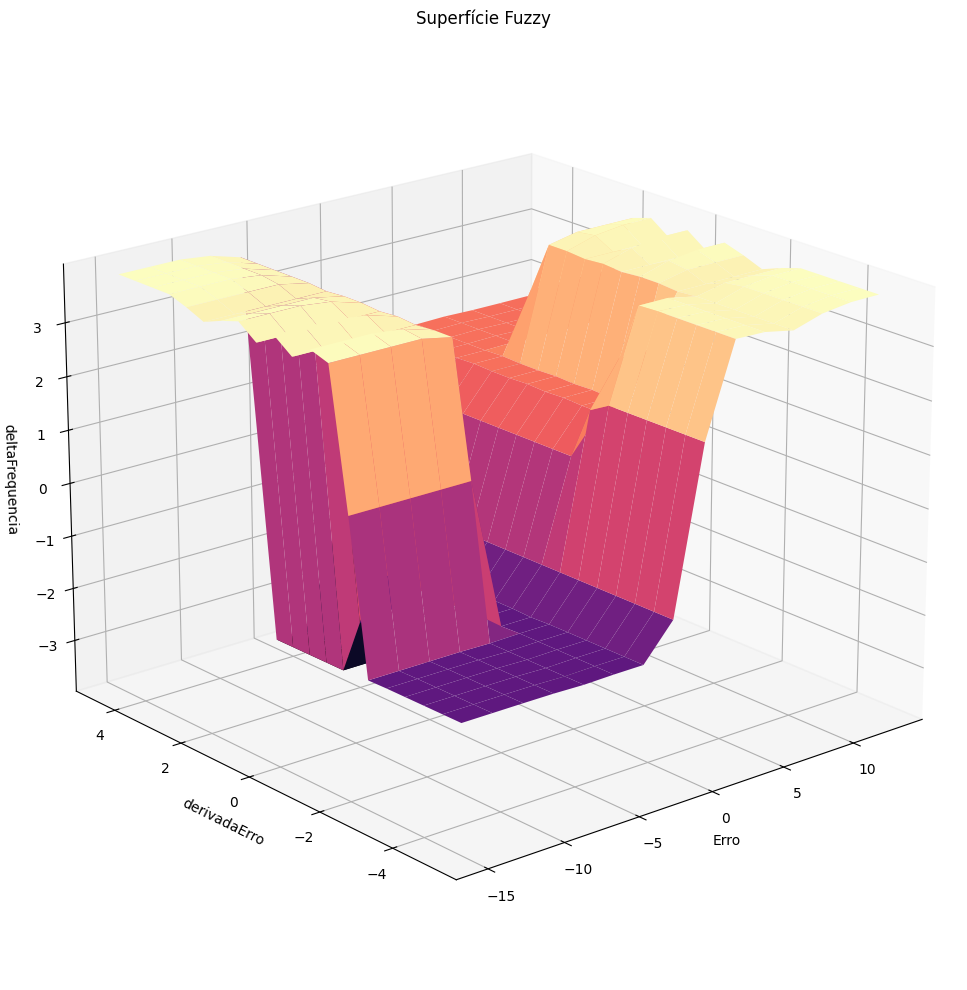

In [155]:
X, Y = np.meshgrid(X_erro, Y_derivadaErro)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_deltaFrequencia.T, cmap='magma')

ax.set_xlabel('Erro')
ax.set_ylabel('derivadaErro')
ax.set_zlabel('deltaFrequencia')

plt.title('Superfície Fuzzy')
plt.tight_layout()
ax.view_init(azim=-130, elev=20)

plt.show()